## 1. 데이터 로드 및 구조 확인

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## 2. 기술통계량
Species별 Petal Length의 평균, 개수, 표준편차, 최소/최대, 사분위수 등을 출력하고 그룹별 데이터 개수를 확인하시오.

In [5]:
iris.groupby("species")["petal_length"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [6]:
iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## 3. 시각화
Species별 Petal Length의 분포를 Boxplot으로 시각화 하시오.

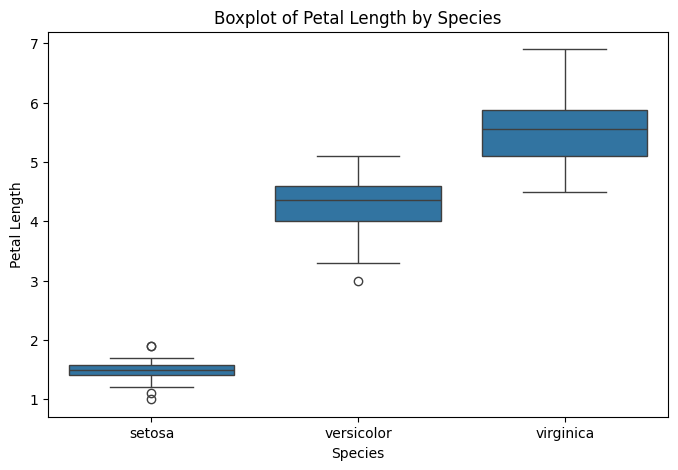

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=iris,
    x="species",
    y="petal_length"
)

plt.title("Boxplot of Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length")
plt.show()

## 4. 정규성 검정 (Shapiro-Wilk)

In [5]:
from scipy.stats import shapiro

for species in iris["species"].unique():
    data = iris.loc[iris["species"] == species, "petal_length"]
    stat, p_value = shapiro(data)
    print(f"{species}: p-value = {p_value:.5f}")

setosa: p-value = 0.05481
versicolor: p-value = 0.15848
virginica: p-value = 0.10978


## 5. 등분산성 검정 (Levene)

In [9]:
from scipy.stats import levene

setosa = iris.loc[iris["species"] == "setosa", "petal_length"]
versicolor = iris.loc[iris["species"] == "versicolor", "petal_length"]
virginica = iris.loc[iris["species"] == "virginica", "petal_length"]

stat, p_value = levene(setosa, versicolor, virginica)
print(p_value)

3.1287566394085344e-08


## 7. One way ANOVA

In [10]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(setosa, versicolor, virginica)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.5e}")

F-statistic: 1180.1612
p-value: 2.85678e-91


## 8. 사후검정(Tukey HSD)

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(
    endog=iris["petal_length"],   
    groups=iris["species"],      
    alpha=0.05
)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


## 10. 회귀분석

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = iris[["sepal_length", "sepal_width", "petal_width"]]
y = iris["petal_length"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": model.coef_
})

print(coef_df)
print("Intercept:", model.intercept_)

MSE: 0.10913071951125887
R^2: 0.967636014590789
       Variable  Coefficient
0  sepal_length     0.745236
1   sepal_width    -0.651708
2   petal_width     1.453794
Intercept: -0.32381864485354317
